## 환율 예측 

### ARIMA

In [ ]:
# 데이터 가져오기 및 ARIMA 모델 예측

In [1]:
pip install matplotlib

   ---------------------------------------- 7.9/7.9 MB 16.4 MB/s eta 0:00:00



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pingouin 0.5.3 requires pandas-flavor>=0.2.0, which is not installed.


In [1]:
import sys
print(sys.executable)

c:\users\jyb\appdata\local\programs\python\python39\python.exe


In [3]:
pip install numpy

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires absl-py~=0.10, but you have absl-py 2.1.0 which is incompatible.
tensorflow 2.5.0 requires flatbuffers~=1.12.0, but you have flatbuffers 24.3.25 which is incompatible.
tensorflow 2.5.0 requires grpcio~=1.34.0, but you have grpcio 1.64.1 which is incompatible.
tensorflow 2.5.0 requires h5py~=3.1.0, but you have h5py 3.11.0 which is incompatible.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.26.4 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.12.2 which is incompatible.


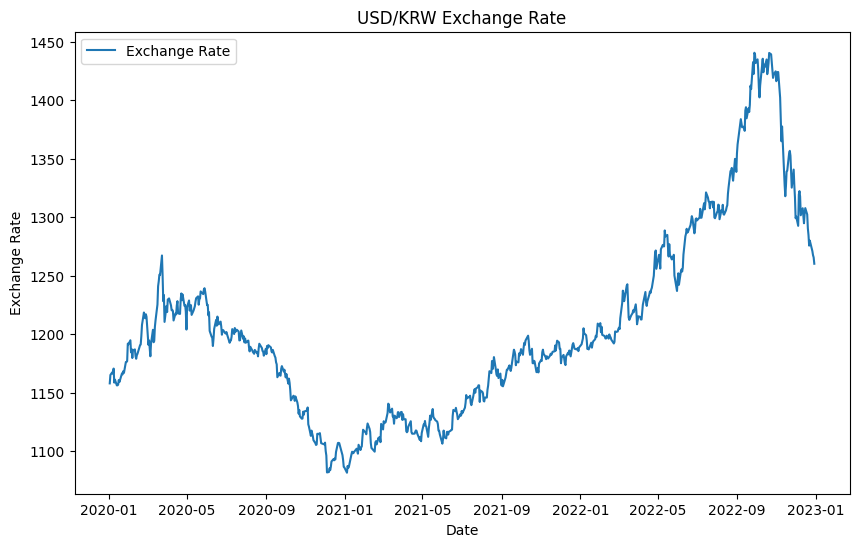

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

                               SARIMAX Results                                
Dep. Variable:                DEXKOUS   No. Observations:                  749
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2492.956
Date:                Mon, 10 Jun 2024   AIC                           4997.912
Time:                        16:28:14   BIC                           5025.617
Sample:                             0   HQIC                          5008.589
                                - 749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0382      0.027     -1.400      0.162      -0.092       0.015
ar.L2          0.0427      0.028      1.522      0.128      -0.012       0.098
ar.L3         -0.0020      0.027     -0.074      0.9

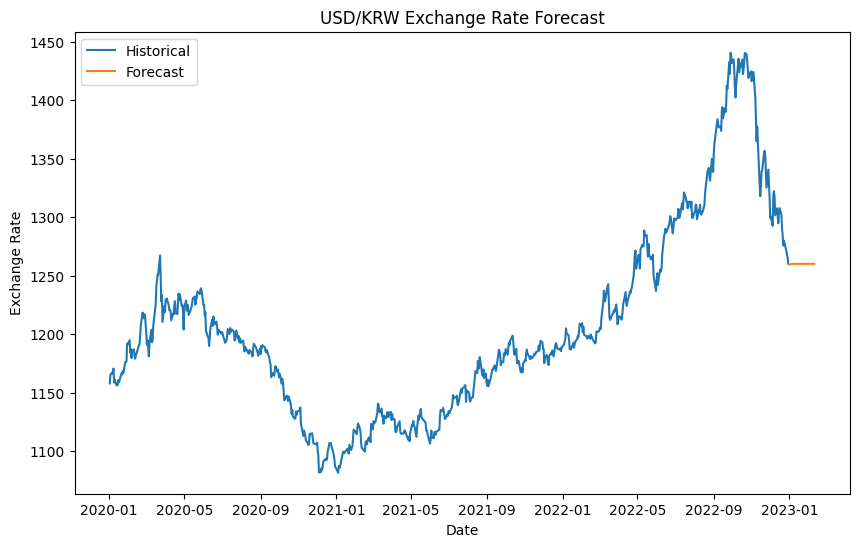

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from statsmodels.tsa.arima.model import ARIMA
import datetime

# 데이터 가져오기
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
df = pdr.get_data_fred('DEXKOUS', start=start_date, end=end_date)

# 결측치 처리
df = df.dropna()

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(df, label='Exchange Rate')
plt.title('USD/KRW Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# 데이터 준비
exchange_rate = df['DEXKOUS']

# ARIMA 모델 학습
model = ARIMA(exchange_rate, order=(5, 1, 0))
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())

# 예측
forecast_steps = 30  # 30일 예측
forecast = model_fit.forecast(steps=forecast_steps)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate, label='Historical')
forecast_index = pd.date_range(start=exchange_rate.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
plt.plot(forecast_index, forecast, label='Forecast')
plt.title('USD/KRW Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [4]:
pip install --upgrade matplotlib 

In [7]:
forecast.values

array([1259.57161848, 1259.78415423, 1259.88831684, 1259.75096968,
       1260.08282184, 1260.11456774, 1260.11912269, 1260.10592525,
       1260.13225   , 1260.1105644 , 1260.1106949 , 1260.10875091,
       1260.11106164, 1260.1080767 , 1260.10971813, 1260.10941714,
       1260.10974799, 1260.10941789, 1260.10972308, 1260.10957417,
       1260.10962987, 1260.10958253, 1260.10962396, 1260.10959279,
       1260.10960839, 1260.10960036, 1260.10960657, 1260.10960168,
       1260.10960497, 1260.1096032 ])

In [8]:
forecast

749    1259.571618
750    1259.784154
751    1259.888317
752    1259.750970
753    1260.082822
754    1260.114568
755    1260.119123
756    1260.105925
757    1260.132250
758    1260.110564
759    1260.110695
760    1260.108751
761    1260.111062
762    1260.108077
763    1260.109718
764    1260.109417
765    1260.109748
766    1260.109418
767    1260.109723
768    1260.109574
769    1260.109630
770    1260.109583
771    1260.109624
772    1260.109593
773    1260.109608
774    1260.109600
775    1260.109607
776    1260.109602
777    1260.109605
778    1260.109603
Name: predicted_mean, dtype: float64

In [2]:
pip install statsmodels

  Using cached statsmodels-0.14.2-cp39-cp39-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.2-cp39-cp39-win_amd64.whl (9.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip uninstall numpy scipy pandas pandas_datareader statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


### LSTM(Long Short-Term Memory) 모델

#### 데이터 준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas_datareader as pdr
import datetime

# 데이터 가져오기
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
df = pdr.get_data_fred('DEXKOUS', start=start_date, end=end_date)

# 결측치 처리
df = df.dropna()


#### LSTM 모델 생성 및 학습

In [ ]:
# 데이터 가져오기: pandas_datareader를 사용하여 달러/원 환율 데이터를 가져옵니다.
# 데이터 전처리: MinMaxScaler를 사용하여 데이터를 0과 1 사이로 정규화합니다.
# 학습 데이터와 테스트 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
# 데이터셋 생성: LSTM 모델에 입력으로 사용될 데이터셋을 생성합니다.
# LSTM 모델 생성: 두 개의 LSTM 레이어와 두 개의 Dense 레이어를 가진 모델을 생성합니다.
# 모델 컴파일: adam 옵티마이저와 mean_squared_error 손실 함수를 사용하여 모델을 컴파일합니다.
# 모델 학습: 모델을 학습시킵니다.
# 예측: 학습된 모델을 사용하여 예측합니다.
# 예측 데이터 역변환: 예측된 데이터를 원래 스케일로 역변환합니다.
# 시각화: 실제 데이터와 예측된 데이터를 시각화합니다.

In [4]:
import tensorflow as tf
import keras

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


499/499 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - loss: 0.0050
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


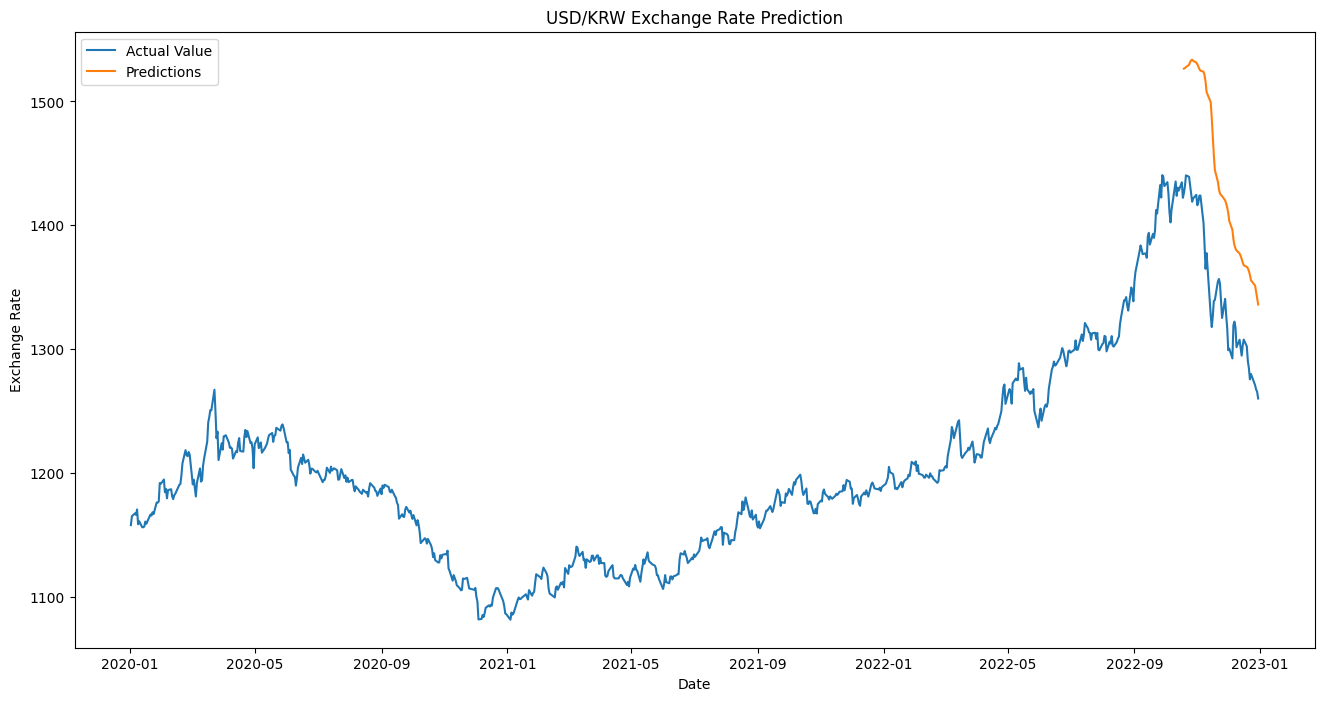

In [27]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 학습 데이터와 테스트 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 데이터셋 생성
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# 데이터셋 모양 변환 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 데이터 역변환
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# 시각화
train_data_len = len(train_data)
valid = df[train_data_len:]

# 예측 값의 길이와 일치하도록 인덱스 맞추기
valid = valid.iloc[time_step:]

# Predictions 열 추가
valid['Predictions'] = test_predict

# 그래프 출력
plt.figure(figsize=(16, 8))
plt.title('USD/KRW Exchange Rate Prediction')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.plot(df['DEXKOUS'], label='Actual Value')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend()
plt.show()

In [ ]:
# 확인 사항
# Python 버전: 사용 중인 Python 버전이 TensorFlow와 호환되는지 확인하세요. 일반적으로 TensorFlow는 Python 3.6 이상에서 잘 작동합니다.
# 모든 패키지가 최신 버전인지 확인: 모든 패키지가 최신 버전으로 업데이트되어 있는지 확인하세요.

### 랜덤포레스트

Train RMSE: 2.9220497009862574
Test RMSE: 7.589418412050796


C:\Users\JYB\AppData\Local\Temp/ipykernel_16128/766514797.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


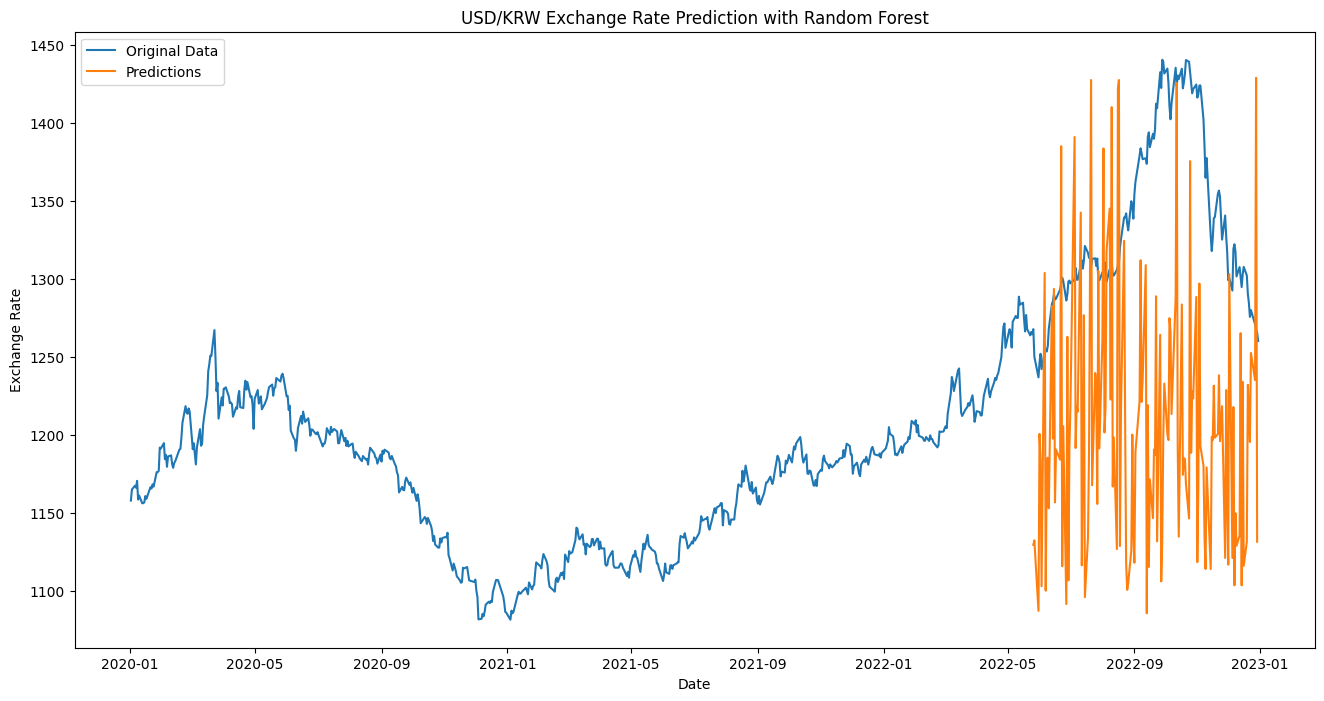

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import datetime

# 데이터 가져오기
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
df = pdr.get_data_fred('DEXKOUS', start=start_date, end=end_date)

# 결측치 처리
df = df.dropna()

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 데이터셋 생성
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 랜덤포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, Y_train)

# 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 데이터 역변환
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# 모델 평가
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# 시각화
# 훈련 데이터 길이
train_data_len = len(X_train)
# 전체 데이터 길이
total_data_len = len(df) - time_step - 1

# valid 데이터프레임 생성
valid = df.iloc[train_data_len + time_step:total_data_len + time_step]
valid['Predictions'] = test_predict

plt.figure(figsize=(16, 8))
plt.title('USD/KRW Exchange Rate Prediction with Random Forest')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.plot(df['DEXKOUS'], label='Original Data')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend()
plt.show()


In [ ]:
# valid 데이터프레임의 인덱스 맞춤: train_data_len을 훈련 데이터 길이로 설정하고, valid 데이터프레임을 올바르게 생성합니다.
# valid 데이터프레임 인덱스 조정: valid 데이터프레임의 인덱스를 예측값의 길이와 일치하도록 조정했습니다.
# 이제 이 코드를 실행하여 문제가 해결되는지 확인해 보세요. 여전히 문제가 발생하면 구체적인 에러 메시지를 포함하여 다시 알려주세요.